In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import color,io
import os

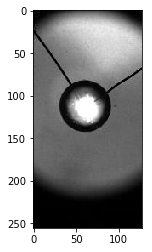

In [3]:
# branje slike in crop
img = io.imread('slika.png')
plt.imshow(img, cmap='gray');

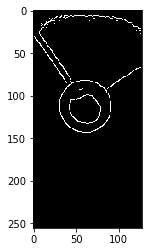

In [4]:
# robovi
edges = canny(img, sigma=3, low_threshold=10, high_threshold=50)
plt.imshow(edges, cmap='gray');

In [5]:
hough_radii = np.arange(10, 50, 1) # iscemo radije od 10 pikslov do 50 pikslov
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=2) # dva kroga, zunanji in notranji

print(cx, cy, radii) # oba kroga imata isto sredisce (117, 199), prvi je vecji (21)

[61 60] [113 113] [30 31]


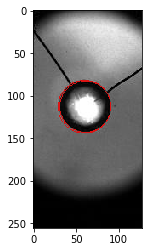

In [6]:
# jih se narisemo
img = color.gray2rgb(img)
for x, y, r, in zip(cx, cy, radii):
    i, j = circle_perimeter(x, y, r)
    img[j, i] = (220, 20, 20)
plt.imshow(img)

In [7]:
# itak iscemo samo premer, tko da lahko vzamemo lepo najvecjega
max(radii)

31

In [8]:
# in se zapakiramo v funkcijo
def bubble_size(img_path,sf=3,lt=10,ht=50):
    """Returns size of bubble in pixels."""
    img = io.imread(img_path)
    edges = canny(img, sigma=sf, low_threshold=lt, high_threshold=ht)
    hough_radii = np.arange(10, 50, 1)
    hough_res = hough_circle(edges, hough_radii)
    _, _, _, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=2)
    return max(radii)
    
print(bubble_size('slika.png'))

31


In [18]:
mapa = str(input('Vnesite pot datoteke? '))

Vnesite pot datoteke? C:\Users\Jure Podobnikar\Desktop\Diploma\Posnetki\2.stena(300000fps)_S1


In [19]:
slike=[]

for file in os.listdir(mapa):
    if file.endswith(".jpg"):
        slike.append(os.path.join(mapa, file))

In [23]:
radiji=[];

korak=5

for i in range(1,len(slike),korak):
    radiji.append(bubble_size(slike[i]))
    
print(radiji);    

[11, 14, 16, 15, 15, 24, 26, 28, 30, 32, 33, 35, 36, 37, 38, 39, 39, 40, 41, 41, 42, 43, 44, 45, 45, 46, 46, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 46, 46, 45, 45, 44, 43, 43, 42, 41, 40, 40, 39, 38, 36, 35, 33, 30, 28, 24, 11, 10, 10, 10, 11, 10, 12, 17, 18, 12, 12, 12, 30, 10, 11, 14, 10, 11, 10, 22, 12, 10, 11, 11, 11, 14, 11, 14, 10, 10, 10, 14, 14, 11, 20, 13, 12, 12, 14, 11, 13, 12, 10, 11, 11, 11, 13, 13, 10, 12, 11, 14, 14, 11, 13, 14, 14, 11, 14, 14, 13, 14, 11, 11, 14, 15, 10, 15, 15, 15, 15, 15, 15, 14, 11, 15, 15, 15, 15, 15, 15, 16, 12, 16, 16, 16, 15, 13, 12, 12, 13, 12, 12, 12, 11, 13, 12, 17, 12, 11, 12, 12, 11, 12, 13, 17, 13, 13, 12, 17, 12, 11, 12, 11, 12, 11, 12, 11, 12, 12, 12, 10, 13, 12, 13, 11, 12, 11, 12, 11, 11, 11, 12, 11, 11, 12, 10, 12, 12, 13, 13, 11, 12, 10, 12, 13, 12, 11, 12, 12, 11, 11, 12, 11, 12, 12, 11, 11, 11, 12, 10]


C:\Users\Jure Podobnikar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


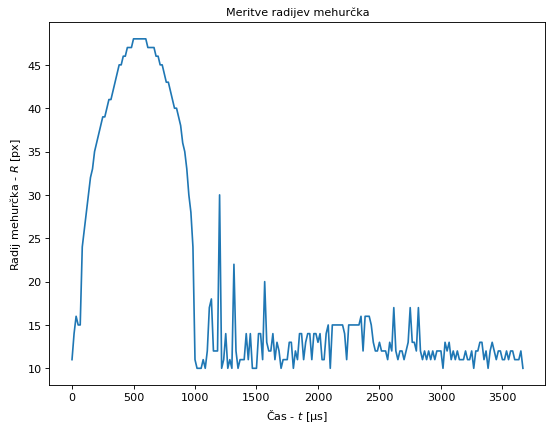

In [31]:
t=[(i-1)*3.3333*korak for i in range(1,len(radiji)+1)]

fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t, radiji)

plt.title('Meritve radijev mehurčka', fontsize = 10);
plt.ylabel('Radij mehurčka - $R$ [px]')
plt.xlabel('Čas - $t$ [μs]')
plt.legend(loc = 1)
plt.show()